![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<div style="text-align: center;">
    <h2><u>ANALYSE DE FATEURS CLÉS QUI INFLUENCE LA RÉUSSITE SCOLAIRE DES ÉTUDIANTS</u></h2>
</div>

In [2]:
# import the librarie
import os
import pandas as pd
import seaborn as sns
from tabulate import tabulate
from operator import itemgetter
import matplotlib.pyplot as plt

In [3]:
# fine the file data
files = [file for file in os.listdir(r'https://github.com/hyontnick/Canam_Concour_BI_Hyonta_B/blob/main')]
for file in files:
    print(file)

data.csv


In [4]:
# create path variable file
path = r'https://github.com/hyontnick/Canam_Concour_BI_Hyonta_B/blob/main'

In [5]:
#  read structurale data
for file in files:
    current_data = pd.read_csv(path+'/'+file)
    print(current_data.shape) 

(3000, 40)


In [6]:
# create data frame
dataA = pd.DataFrame()

dataA = pd.read_csv(path+'/data.csv')

In [7]:
# drop line that content null value
dataAA = pd.DataFrame()

dataAA = dataA.dropna()

In [8]:
# drop column that content null value
dataAAA = pd.DataFrame()

dataAAA = dataAA.dropna(axis = 1)

In [9]:
# drop line that all registrer is null
data = pd.DataFrame()

data = dataAAA.dropna(how = 'all')

In [10]:
# read head data
data.head()

,gender,age,race/ethnicity,parental level of education,ParentMaritalStatus,PracticeSport,lunch,school mark,school_type,test preparation course,...,Taking notes in classes,Listening in classes,teaching_method,school_setting,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Structuring of the course,score,decision
0,female,24,group B,high school,married,regularly,standard,4,Non-Public,completed,...,never,Law,Standard,Urban,Law,Moderate,Moderate,Law,86,PASS
1,female,24,group E,'bachelor''s degree',married,sometimes,standard,3,Non-Public,completed,...,sometimes,Law,Standard,Urban,Moderate,High,Moderate,Law,96,PASS
2,female,19,group C,high school,single,sometimes,standard,1,Non-Public,completed,...,regulary,Law,Standard,Urban,Moderate,Moderate,Moderate,Law,82,PASS
3,male,21,group D,high school,married,never,free/reduced,1,Non-Public,none,...,regulary,High,Standard,Urban,Moderate,Moderate,Law,High,53,FAIL
4,male,19,group C,some high school,married,sometimes,standard,5,Non-Public,none,...,never,High,Standard,Urban,High,High,Moderate,Moderate,44,FAIL


In [11]:
# fine data type
data.dtypes

gender                                        object
age                                            int64
race/ethnicity                                object
parental level of education                   object
ParentMaritalStatus                           object
PracticeSport                                 object
lunch                                         object
school mark                                    int64
school_type                                   object
test preparation course                       object
Stress                                        object
daily studing time                             int64
prefer to study in                            object
Financial Status                              object
social_support                                object
extracurricular_activities                    object
teacher_student_relationship                  object
anxiety_level                                 object
self_esteem                                   

In [12]:
# view data integrity
data.isnull().sum()

gender                                        0
age                                           0
race/ethnicity                                0
parental level of education                   0
ParentMaritalStatus                           0
PracticeSport                                 0
lunch                                         0
school mark                                   0
school_type                                   0
test preparation course                       0
Stress                                        0
daily studing time                            0
prefer to study in                            0
Financial Status                              0
social_support                                0
extracurricular_activities                    0
teacher_student_relationship                  0
anxiety_level                                 0
self_esteem                                   0
depression                                    0
noise_level                             

In [13]:
# view stast quantitative data
data.describe()

,age,school mark,daily studing time,week_absences,Sleep_Hours,score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,20.998667,2.979333,3.481333,2.408667,5.478333,68.272333
std,1.992483,1.406496,1.119555,2.390724,1.111430,14.307937
min,18.000000,1.000000,2.000000,0.000000,4.000000,20.000000
25%,19.000000,2.000000,2.000000,1.000000,4.000000,59.000000
50%,21.000000,3.000000,3.000000,2.000000,5.000000,69.000000
75%,23.000000,4.000000,4.000000,4.000000,6.000000,79.000000
max,24.000000,5.000000,5.000000,8.000000,7.000000,100.000000


## Visualisation des données

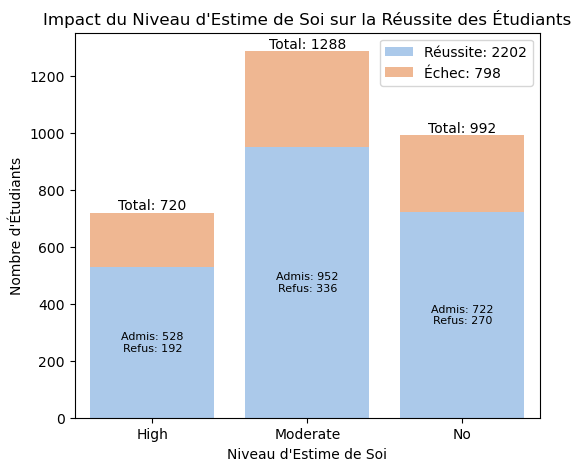

In [14]:
# Impact du Niveau d'Estime de Soi sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='self_esteem', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 5))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact du Niveau d'Estime de Soi sur la Réussite des Étudiants")
plt.xlabel("Niveau d'Estime de Soi")
plt.ylabel("Nombre d'Étudiants")
plt.legend()
plt.show()

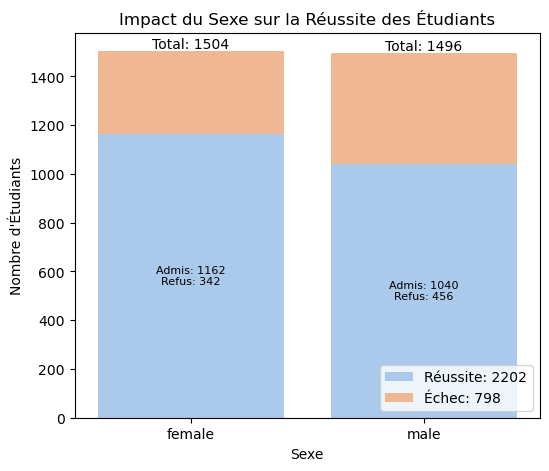

In [47]:
# Impact du Niveau du Sexe sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='gender', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table = pivot_table.join(totals_df)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 5))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table["PASS"].sum()}')
sns.barplot(data=pivot_table, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table["FAIL"].sum()}', bottom=pivot_table['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table['PASS'], pivot_table['FAIL'], pivot_table['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact du Sexe sur la Réussite des Étudiants")
plt.xlabel("Sexe")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='lower right')
plt.show()

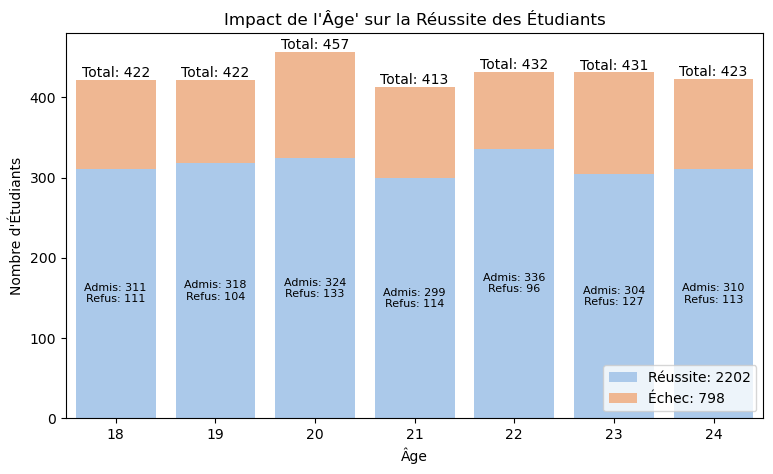

In [134]:
# Impact de l\'Âge' sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='age', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(9, 5))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact de l\'Âge' sur la Réussite des Étudiants")
plt.xlabel("Âge")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc="lower right")
plt.show()

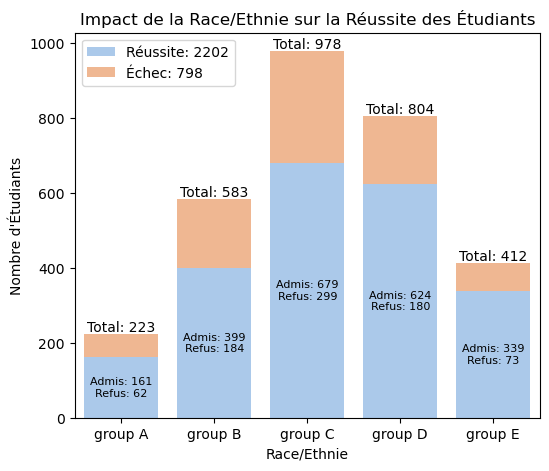

In [136]:
# Impact de la Race/ethnie sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='race/ethnicity', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 5))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact de la Race/Ethnie sur la Réussite des Étudiants")
plt.xlabel("Race/Ethnie")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='upper left')
plt.show()

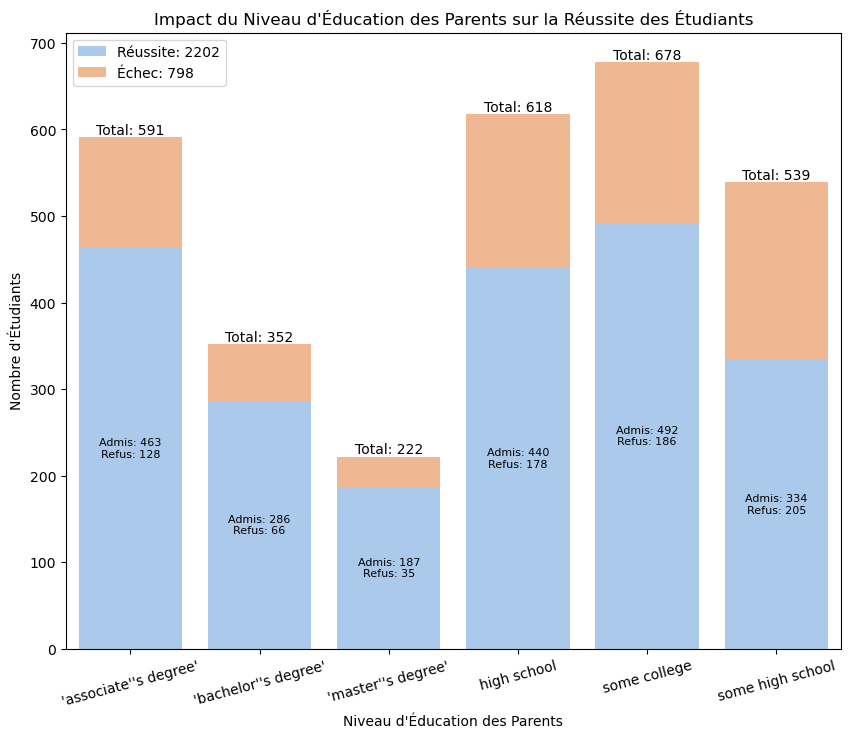

In [138]:
# Impact du Niveau d'Éducation des Parents sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='parental level of education', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(10, 8))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact du Niveau d\'Éducation des Parents sur la Réussite des Étudiants")
plt.xlabel("Niveau d\'Éducation des Parents")
plt.ylabel("Nombre d'Étudiants")
plt.xticks(rotation=15)
plt.legend(loc='best')
plt.show()

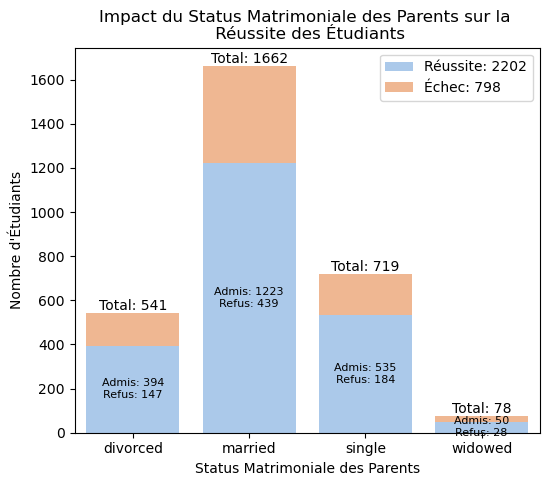

In [139]:
# Impact du Status Matrimoniale des Parents sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='ParentMaritalStatus', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 5))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact du Status Matrimoniale des Parents sur la \n Réussite des Étudiants")
plt.xlabel("Status Matrimoniale des Parents")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='upper right')
plt.show()

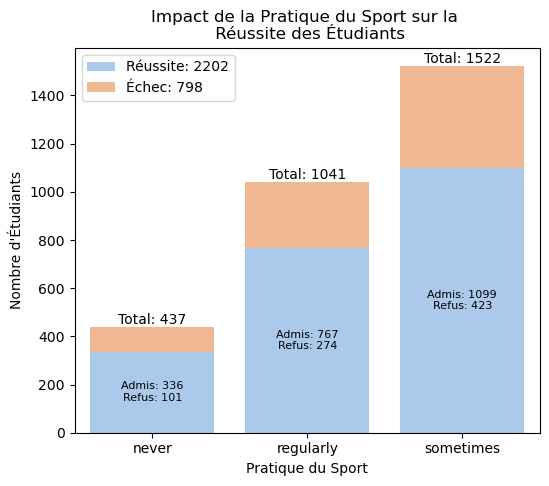

In [70]:
# Impact de la Pratique du Sport sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='PracticeSport', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table = pivot_table.join(totals_df)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 5))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table["PASS"].sum()}')
sns.barplot(data=pivot_table, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table["FAIL"].sum()}', bottom=pivot_table['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table['PASS'], pivot_table['FAIL'], pivot_table['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact de la Pratique du Sport sur la \n Réussite des Étudiants")
plt.xlabel("Pratique du Sport")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='upper left')
plt.show()

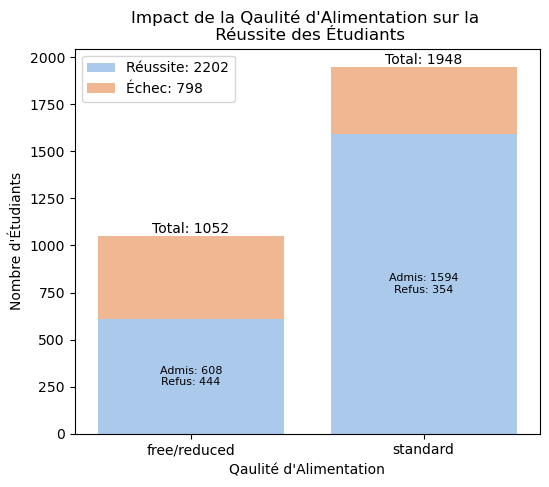

In [140]:
# Impact de la Qaulité d'Alimentation sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='lunch', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 5))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact de la Qaulité d'Alimentation sur la \n Réussite des Étudiants")
plt.xlabel("Qaulité d'Alimentation")
plt.ylabel("Nombre d'Étudiants")
plt.legend()
plt.show()

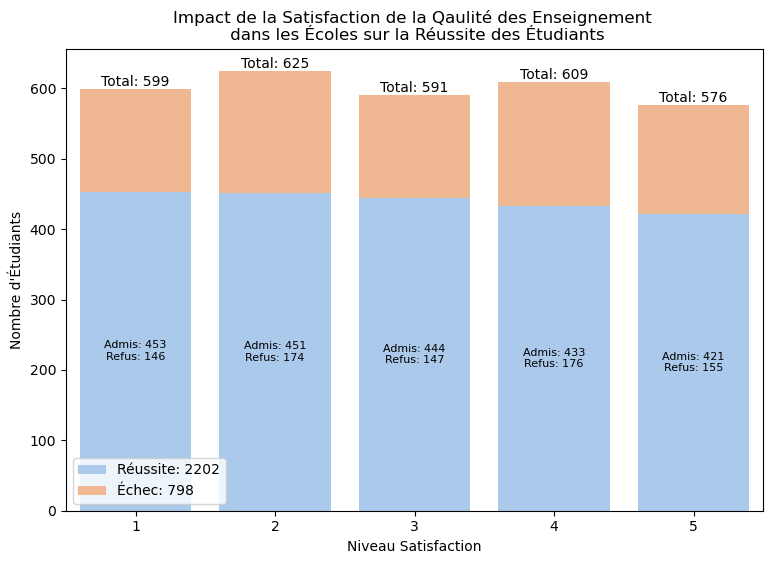

In [141]:
# Impact de la Satisfaction de la Qaulité des Enseignement dans les Écoles sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='school mark', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=True)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(9, 6))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact de la Satisfaction de la Qaulité des Enseignement \n dans les Écoles sur la Réussite des Étudiants")
plt.xlabel("Niveau Satisfaction")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='lower left')
plt.show()

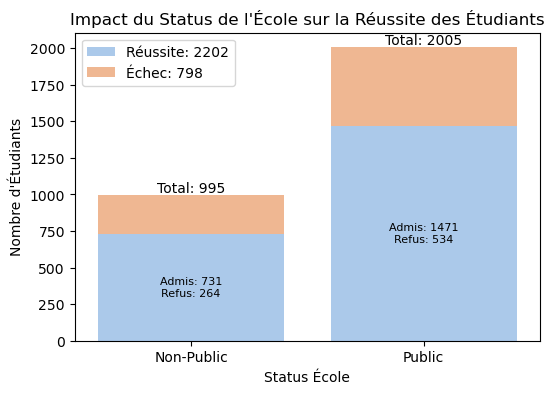

In [143]:
# Impact du Status de l'École sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='school_type', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact du Status de l'École sur la Réussite des Étudiants")
plt.xlabel("Status École")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='upper left')
plt.show()

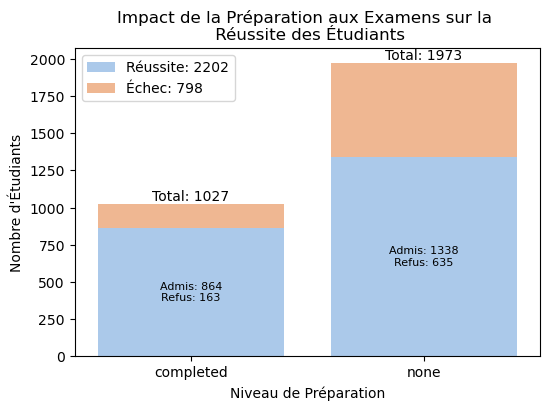

In [145]:
# Impact de la Préparation aux Examens sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='test preparation course', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact de la Préparation aux Examens sur la \n Réussite des Étudiants")
plt.xlabel("Niveau de Préparation")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='upper left')
plt.show()

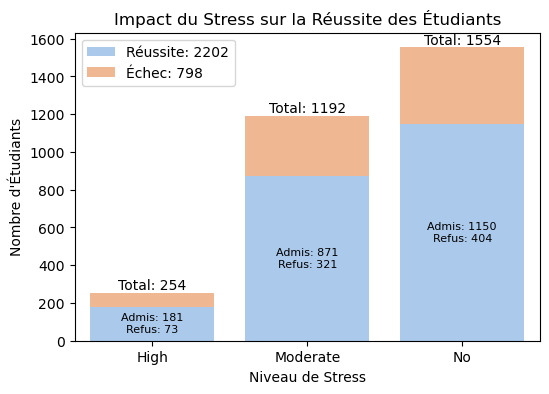

In [163]:
# Impact du Stress sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='Stress', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=True)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact du Stress sur la Réussite des Étudiants")
plt.xlabel("Niveau de Stress")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='upper left')
plt.show()

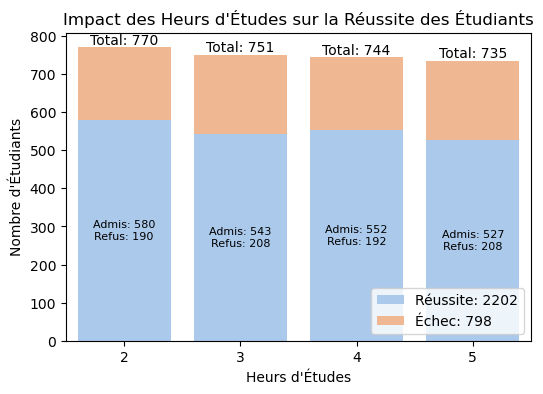

In [147]:
# Impact des Heurs d'Études sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='daily studing time', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact des Heurs d'Études sur la Réussite des Étudiants")
plt.xlabel("Heurs d'Études")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='lower right')
plt.show()

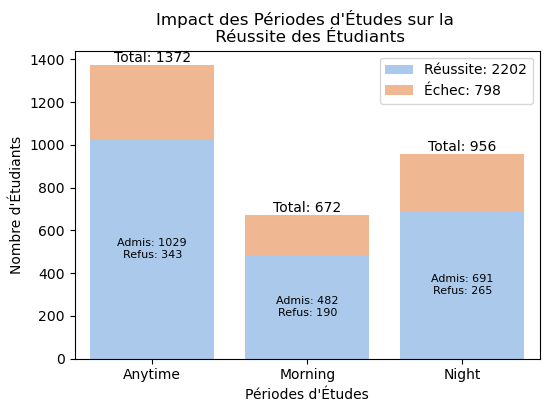

In [221]:
# Impact des Périodes d'Études sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='prefer to study in', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact des Périodes d'Études sur la \n Réussite des Étudiants")
plt.xlabel("Périodes d'Études")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='upper right')
plt.show()

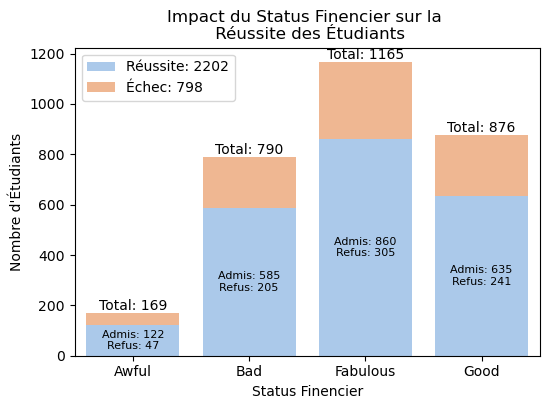

In [222]:
# Impact du Status Finencier sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='Financial Status', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=True)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact du Status Finencier sur la \n Réussite des Étudiants")
plt.xlabel("Status Finencier")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='upper left')
plt.show()

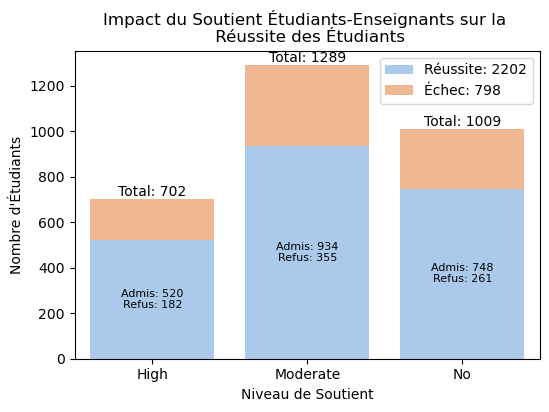

In [224]:
# Impact du Soutient Étudiants-Enseignants sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='teacher_student_relationship', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact du Soutient Étudiants-Enseignants sur la \n Réussite des Étudiants")
plt.xlabel("Niveau de Soutient")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='upper right')
plt.show()

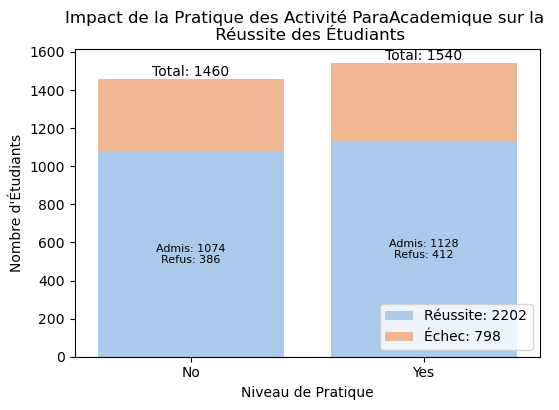

In [226]:
# Impact de la Pratique des Activité ParaAcademique sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='extracurricular_activities', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact de la Pratique des Activité ParaAcademique sur la \n Réussite des Étudiants")
plt.xlabel("Niveau de Pratique")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='lower right')
plt.show()

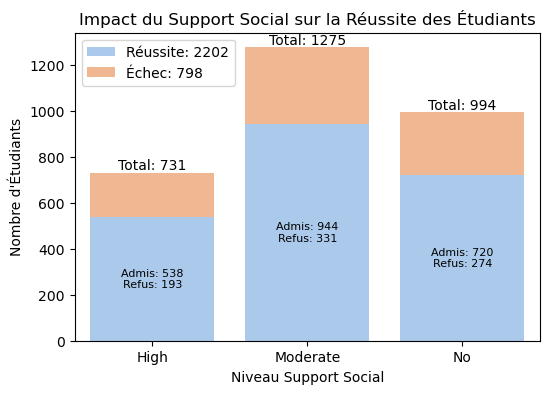

In [232]:
# Impact du Support Social sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='social_support', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact du Support Social sur la Réussite des Étudiants")
plt.xlabel("Niveau Support Social")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='upper left')
plt.show()

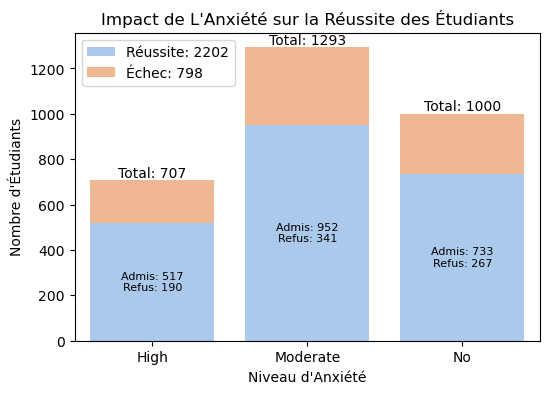

In [229]:
# Impact de L'Anxiété sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='anxiety_level', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact de L'Anxiété sur la Réussite des Étudiants")
plt.xlabel("Niveau d'Anxiété")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='upper left')
plt.show()

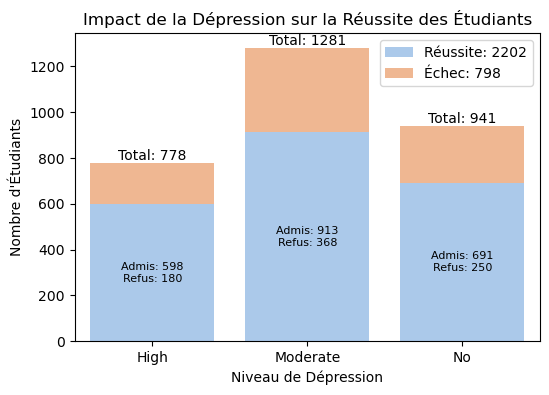

In [233]:
# Impact de la Dépression sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='depression', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact de la Dépression sur la Réussite des Étudiants")
plt.xlabel("Niveau de Dépression")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='upper right')
plt.show()

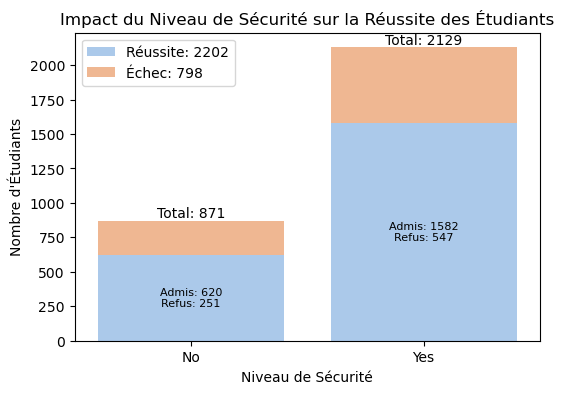

In [235]:
# Impact du Niveau de Sécurité sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='safety', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact du Niveau de Sécurité sur la Réussite des Étudiants")
plt.xlabel("Niveau de Sécurité")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='upper left')
plt.show()

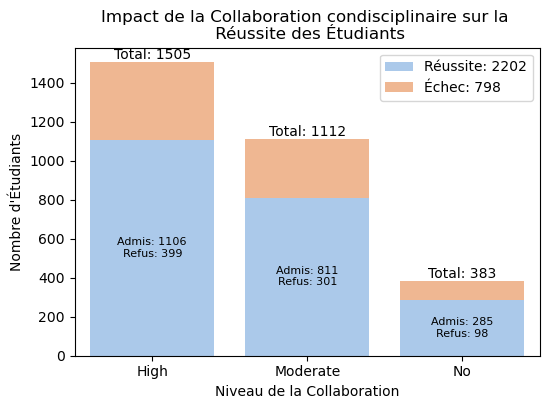

In [240]:
# Impact de la Collaboration condisciplinaire sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='basic_needs', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact de la Collaboration condisciplinaire sur la \n Réussite des Étudiants")
plt.xlabel("Niveau de la Collaboration")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='upper right')
plt.show()

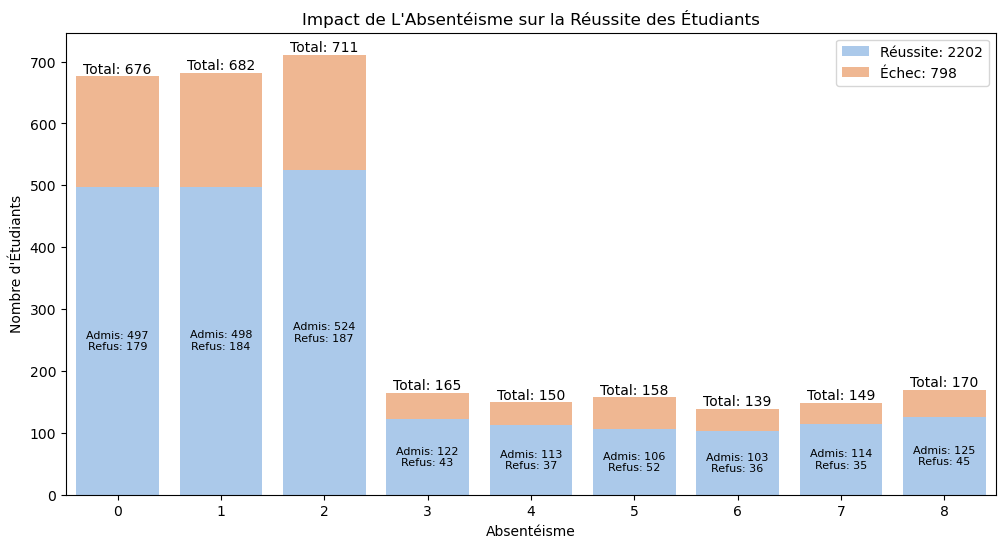

In [238]:
# Impact de l'Absentéisme sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='week_absences', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(12, 6))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact de L'Absentéisme sur la Réussite des Étudiants")
plt.xlabel("Absentéisme")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='upper right')
plt.show()

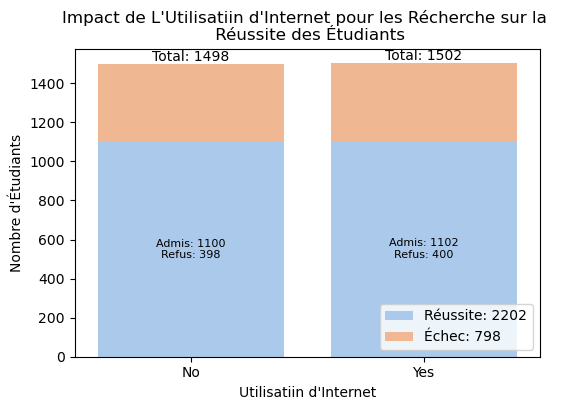

In [239]:
# Impact de L'Utilisatiin d'Internet pour les Récherche sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='internet', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact de L'Utilisatiin d'Internet pour les Récherche sur la \n Réussite des Étudiants")
plt.xlabel("Utilisatiin d'Internet")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='lower right')
plt.show()

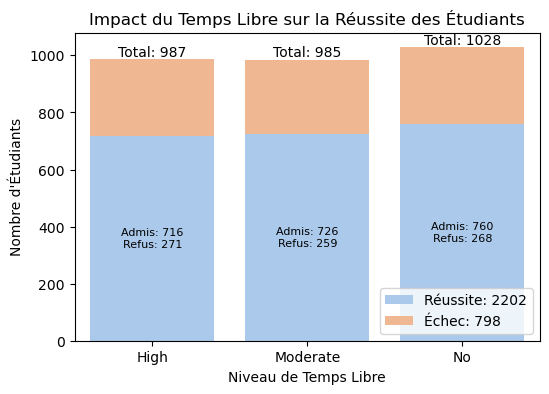

In [241]:
# Impact du Temps Libre sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='daily_freetime', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact du Temps Libre sur la Réussite des Étudiants")
plt.xlabel("Niveau de Temps Libre")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='lower right')
plt.show()

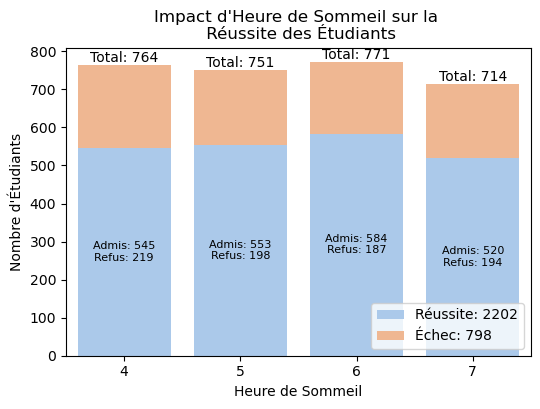

In [248]:
# Impact d'Heure de Sommeil sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='Sleep_Hours', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact d'Heure de Sommeil sur la \n Réussite des Étudiants")
plt.xlabel("Heure de Sommeil")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='lower right')
plt.show()

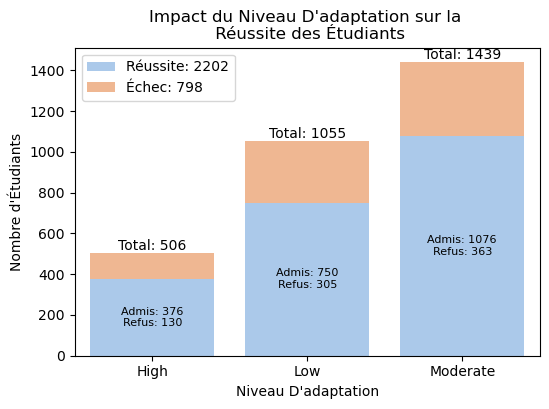

In [247]:
# Impact du Niveau D'adaptation sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='Adaptivity Level', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact du Niveau D'adaptation sur la \n Réussite des Étudiants")
plt.xlabel("Niveau D'adaptation")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='upper left')
plt.show()

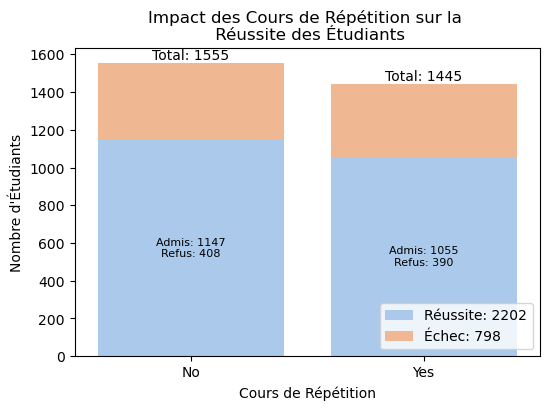

In [246]:
# Impact des Cours de Répétition sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='Additional work', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact des Cours de Répétition sur la \n Réussite des Étudiants")
plt.xlabel("Cours de Répétition")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='lower right')
plt.show()

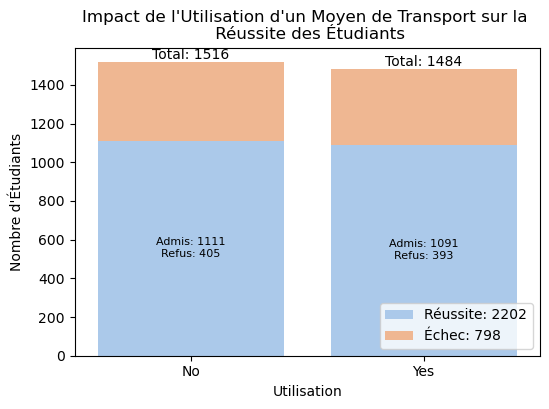

In [250]:
# Impact de l'Utilisation d'un Moyen de Transport sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='Transportation to the school', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact de l'Utilisation d'un Moyen de Transport sur la \n Réussite des Étudiants")
plt.xlabel("Utilisation")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='lower right')
plt.show()

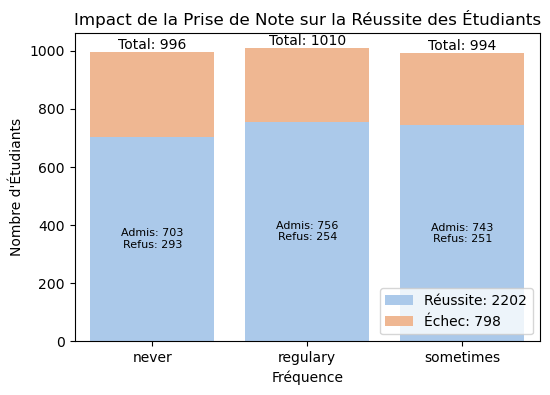

In [251]:
# Impact de la Prise de Note sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='Taking notes in classes', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact de la Prise de Note sur la Réussite des Étudiants")
plt.xlabel("Fréquence")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='lower right')
plt.show()

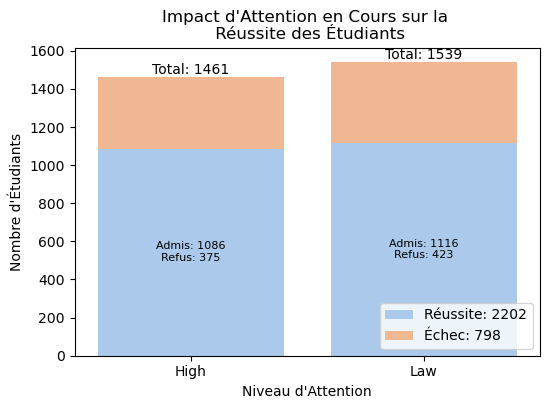

In [253]:
# Impact d'Attention en Cours sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='Listening in classes', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact d'Attention en Cours sur la \n Réussite des Étudiants")
plt.xlabel("Niveau d'Attention")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='lower right')
plt.show()

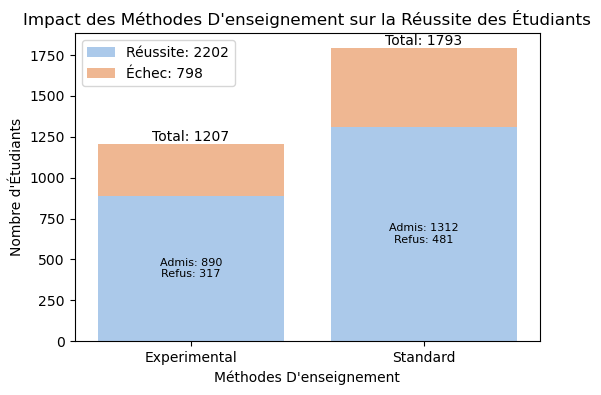

In [255]:
# Impact des Méthodes D'enseignement sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='teaching_method', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact des Méthodes D'enseignement sur la Réussite des Étudiants")
plt.xlabel("Méthodes D'enseignement")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='upper left')
plt.show()

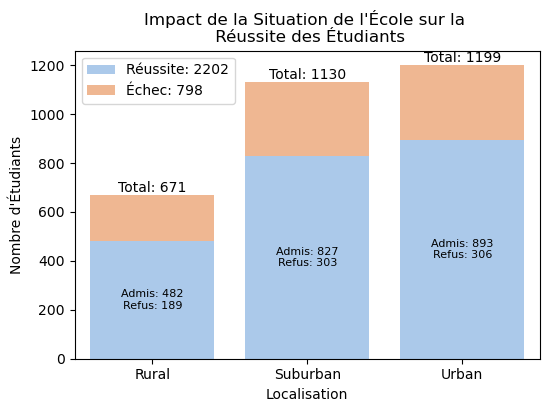

In [258]:
# Impact de la Situation de l'École sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='school_setting', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact de la Situation de l'École sur la \n Réussite des Étudiants")
plt.xlabel("Localisation")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='upper left')
plt.show()

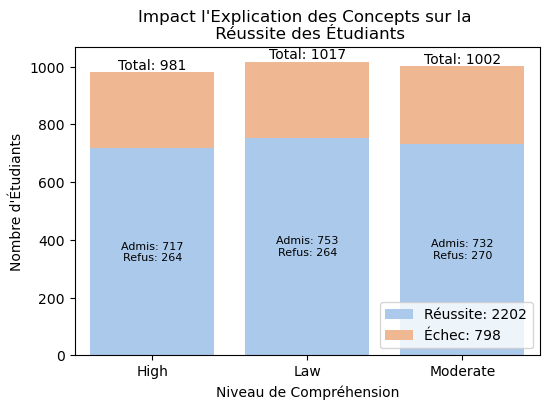

In [262]:
# Impact de l'Explication des Concepts  sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='Explains concepts in an understandable way', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact l'Explication des Concepts sur la \n Réussite des Étudiants")
plt.xlabel("Niveau de Compréhension")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='lower right')
plt.show()

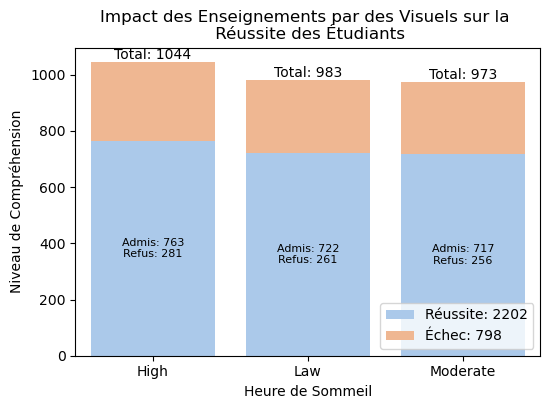

In [261]:
# Impact des Enseignements par des Visuels sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='Use of presentations', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact des Enseignements par des Visuels sur la \n Réussite des Étudiants")
plt.xlabel("Heure de Sommeil")
plt.ylabel("Niveau de Compréhension")
plt.legend(loc='lower right')
plt.show()

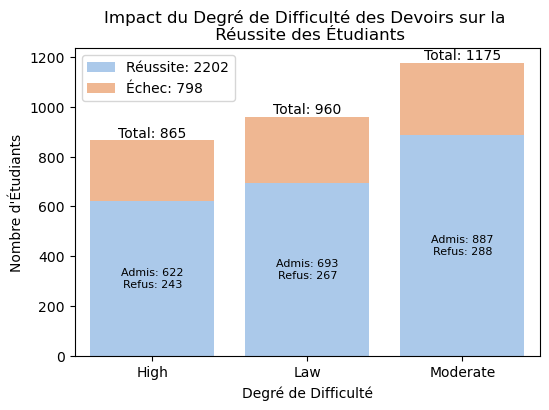

In [267]:
# Impact du Degré de Difficulté des Devoirs sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='Degree of difficulty of assignments', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact du Degré de Difficulté des Devoirs sur la \n Réussite des Étudiants")
plt.xlabel("Degré de Difficulté")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='upper left')
plt.show()

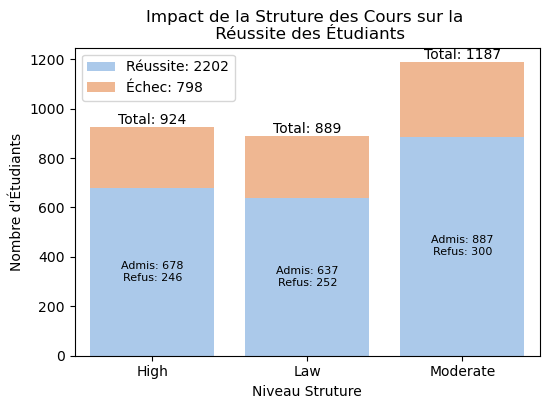

In [268]:
# Impact de la Struture des Cours sur la Réussite des Étudiants

# Créer une table pivot pour compter le nombre de réussites et d'échecs pour chaque niveau d'estime de soi
pivot_table = data.pivot_table(index='Structuring of the course', columns='decision', aggfunc='size', fill_value=0)

# Créer un nouveau dataframe pour calculer les totaux par niveau d'estime de soi
totals_df = pd.DataFrame({'Total': pivot_table.sum(axis=1)})

# Joindre le dataframe de totaux avec la table pivot
pivot_table_sorted = pivot_table.join(totals_df)

# Trier le dataframe par la colonne 'Total' en order decroisant
#pivot_table_sorted = pivot_table.sort_values(by='Total',ascending=False)

# Tracer un diagramme en barres empilées avec Seaborn
plt.figure(figsize=(6, 4))
colors = sns.color_palette("pastel", n_colors=2)

sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='PASS', color=colors[0], label=f'Réussite: {pivot_table_sorted["PASS"].sum()}')
sns.barplot(data=pivot_table_sorted, x=pivot_table.index, y='FAIL', color=colors[1], label=f'Échec: {pivot_table_sorted["FAIL"].sum()}', bottom=pivot_table_sorted['PASS'])

# Ajouter le nombre de réussites et d'échecs à l'intérieur de chaque partie de barre
for i, (pass_count, fail_count, total) in enumerate(zip(pivot_table_sorted['PASS'], pivot_table_sorted['FAIL'], pivot_table_sorted['Total'])):
    plt.text(i, pass_count / 2, f'Admis: {pass_count}\nRefus: {fail_count}', ha='center', va='center', color='black', fontsize=8)
    
# Ajouter les totaux en légende
for i, total in enumerate(pivot_table_sorted['Total']):
    plt.text(i, total, f'Total: {total}', ha='center', va='bottom')

plt.title("Impact de la Struture des Cours sur la \n Réussite des Étudiants")
plt.xlabel("Niveau Struture")
plt.ylabel("Nombre d'Étudiants")
plt.legend(loc='upper left')
plt.show()

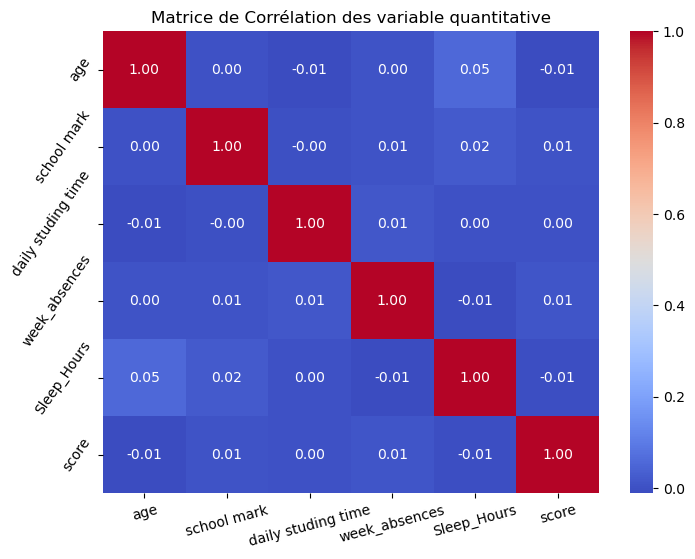

In [272]:
# Sélectionner les colonnes numériques pour la matrice de corrélation
data_pass = pd.DataFrame()
data_pass = data.loc[data['score'] >= 60]

numeric_columns = data.select_dtypes(include=['int64']).columns

# Calculer la matrice de corrélation
correlation_matrix = data_pass[numeric_columns].corr()

# Afficher la matrice de corrélation avec un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation des variable quantitative')
plt.xticks(rotation=15)
plt.yticks(rotation=55)
plt.show()

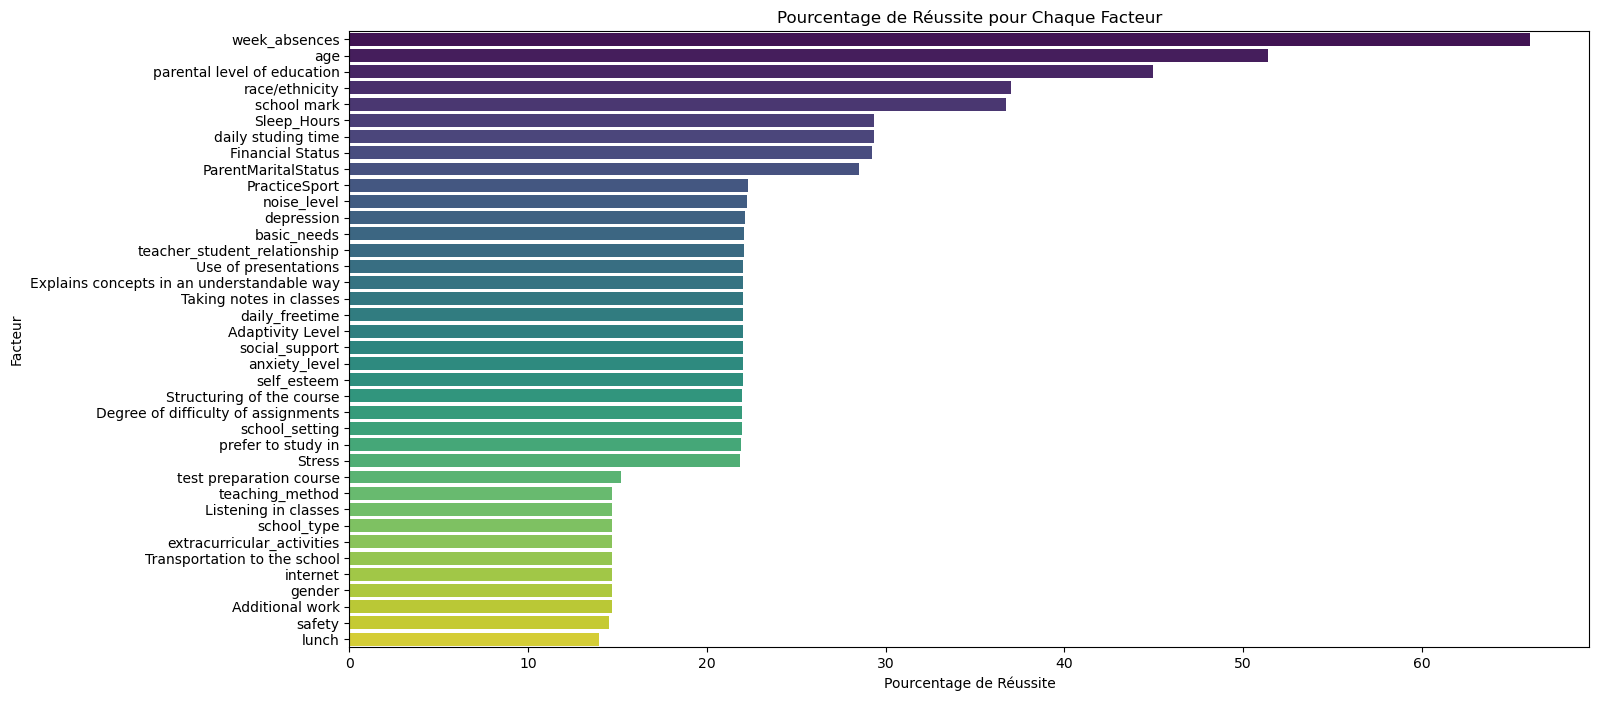

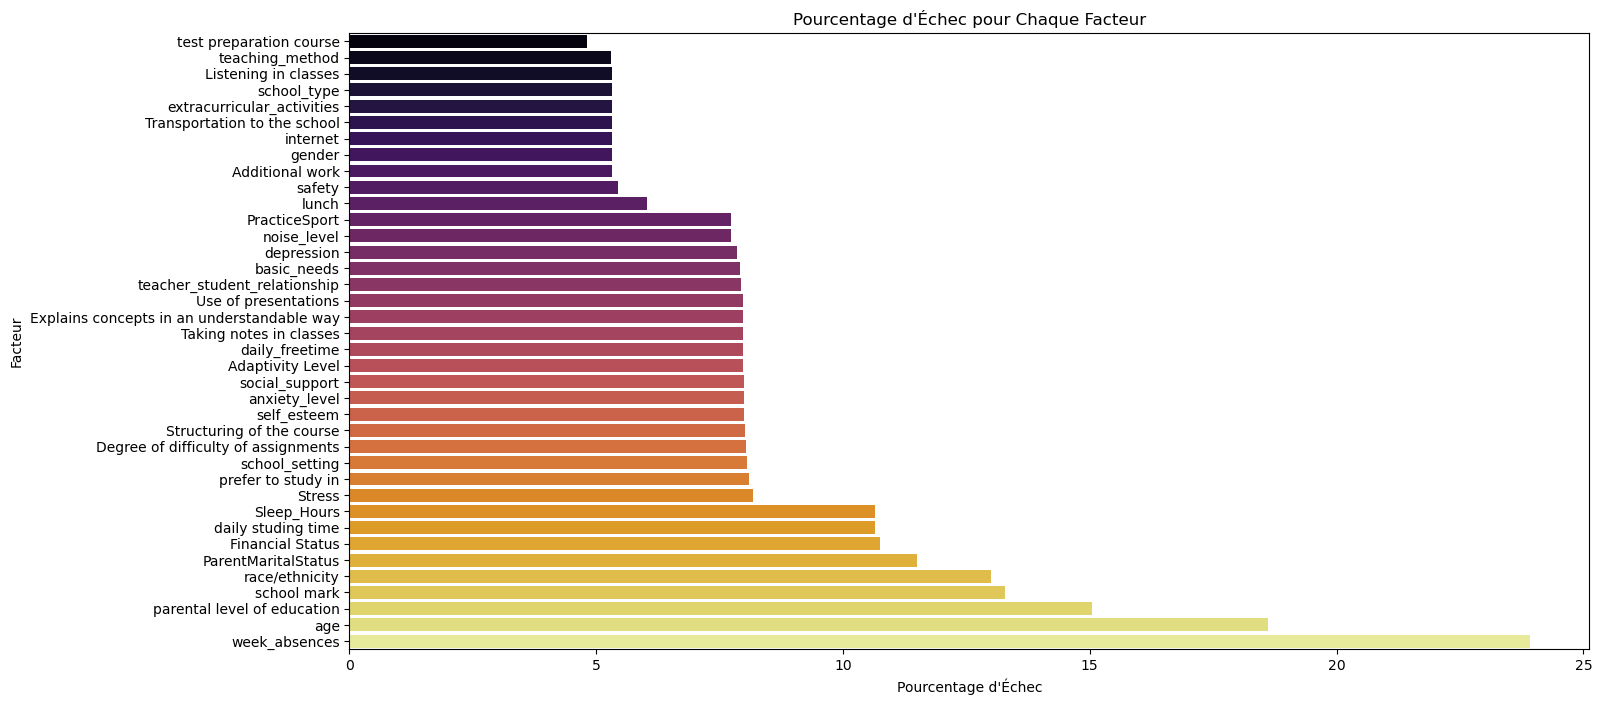

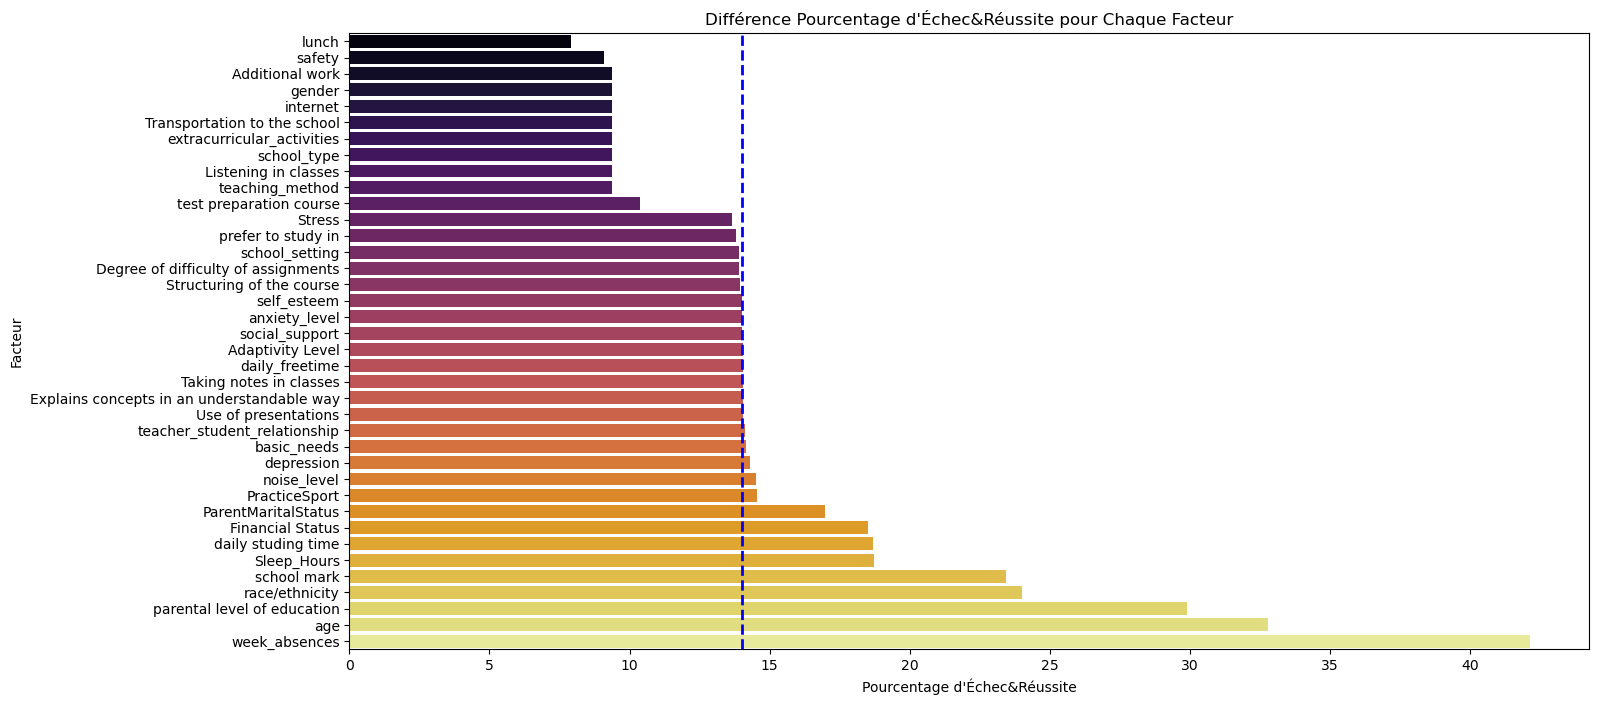

In [36]:
# visualisation des taux de reussite et d'echec

# Liste des colonnes à considérer comme facteurs
facteur_columns = [
    'gender', 'age', 'race/ethnicity', 'parental level of education', 'ParentMaritalStatus',
    'PracticeSport', 'lunch', 'school mark', 'school_type', 'test preparation course',
    'Stress', 'daily studing time', 'prefer to study in', 'Financial Status', 'social_support',
    'extracurricular_activities', 'teacher_student_relationship', 'anxiety_level', 'self_esteem',
    'depression', 'noise_level', 'safety', 'basic_needs', 'week_absences', 'internet',
    'daily_freetime', 'Sleep_Hours', 'Adaptivity Level', 'Additional work',
    'Transportation to the school', 'Taking notes in classes', 'Listening in classes',
    'teaching_method', 'school_setting', 'Explains concepts in an understandable way',
    'Use of presentations', 'Degree of difficulty of assignments', 'Structuring of the course'
]

# Initialiser des listes pour stocker les résultats
resultats_reussite = []
resultats_echec = []
resultats_reussite_echec = []

# Boucler sur chaque facteur
for facteur in facteur_columns:
    # Calculer la table pivot pour le facteur actuel
    pivot_table = pd.pivot_table(data, index=facteur, columns='decision', aggfunc='size', fill_value=0)

    # Calculer les pourcentages pour le facteur actuel
    pourcentages = (pivot_table / pivot_table.sum(axis=1).values[:, None]) * 100

    # Calculer la somme des pourcentages de réussite et d'échec pour le facteur actuel
    somme_reussite = (pourcentages['PASS'].sum()/1000)*100
    somme_echec = (pourcentages['FAIL'].sum()/1000)*100
    diff_reussite_echec = somme_reussite - somme_echec

    # Ajouter les résultats aux listes
    resultats_reussite.append((facteur, somme_reussite))
    resultats_echec.append((facteur, somme_echec))
    resultats_reussite_echec.append((facteur, diff_reussite_echec))

# Trier les résultats
resultats_reussite = sorted(resultats_reussite, key=lambda x: x[1], reverse=True)
resultats_echec = sorted(resultats_echec, key=lambda x: x[1])
resultats_reussite_echec = sorted(resultats_reussite_echec, key=lambda x: x[1])

# Convertir les résultats en DataFrame pour la représentation graphique
df_reussite = pd.DataFrame(resultats_reussite, columns=['Facteur', 'Pourcentage de Réussite'])
df_echec = pd.DataFrame(resultats_echec, columns=['Facteur', 'Pourcentage d\'Échec'])
df_reussite_echec = pd.DataFrame(resultats_reussite_echec, columns=['Facteur', 'Différence Pourcentage d\'Échec&Réussite'])

# Tracer les diagrammes à barres
plt.figure(figsize=(16, 8))
sns.barplot(x='Pourcentage de Réussite', y='Facteur', data=df_reussite, palette='viridis')
plt.title('Pourcentage de Réussite pour Chaque Facteur')
plt.xlabel('Pourcentage de Réussite')
plt.ylabel('Facteur')
plt.show()

plt.figure(figsize=(16, 8))
sns.barplot(x='Pourcentage d\'Échec', y='Facteur', data=df_echec, palette='inferno')
plt.title('Pourcentage d\'Échec pour Chaque Facteur')
plt.xlabel('Pourcentage d\'Échec')
plt.ylabel('Facteur')
plt.show()

plt.figure(figsize=(16, 8))
sns.barplot(x='Différence Pourcentage d\'Échec&Réussite', y='Facteur', data=df_reussite_echec, palette='inferno')
plt.axvline(x=df_reussite_echec['Différence Pourcentage d\'Échec&Réussite'].median(), color = 'blue', linestyle='dashed', linewidth = 2)
plt.title('Différence Pourcentage d\'Échec&Réussite pour Chaque Facteur')
plt.xlabel('Pourcentage d\'Échec&Réussite')
plt.ylabel('Facteur')
plt.show()

In [38]:
# statitique global
student_pass = data.loc[data['score'] >= 60, 'score'].count()
student_fail = data.loc[data['score'] < 60, 'score'].count()
student_number = data.loc[data['score'], 'score'].count()

student_pass_percentage = (student_pass/student_number)*100
student_fail_percentage = (student_fail/student_number)*100

print('\n <=========== Statistique Global ===========> ')
print("||                                         ||")
print("||     Pourcentage de Réussite ",f"{student_pass_percentage:.2f}%","    ||")
print("||     Pourcentage d\'Échec ",f"{student_fail_percentage:.2f}%","        ||")
print("||                                         ||")
print(' <==========================================> ')


 <=========== Statistique Global ===========> 
||                                         ||
||     Pourcentage de Réussite  73.40%     ||
||     Pourcentage d'Échec  26.60%         ||
||                                         ||
 <==========================================> 


In [40]:
# données Statistique

# Liste des colonnes à considérer comme facteurs
facteur_columns = [
    'gender', 'age', 'race/ethnicity', 'parental level of education', 'ParentMaritalStatus',
    'PracticeSport', 'lunch', 'school mark', 'school_type', 'test preparation course',
    'Stress', 'daily studing time', 'prefer to study in', 'Financial Status', 'social_support',
    'extracurricular_activities', 'teacher_student_relationship', 'anxiety_level', 'self_esteem',
    'depression', 'noise_level', 'safety', 'basic_needs', 'week_absences', 'internet',
    'daily_freetime', 'Sleep_Hours', 'Adaptivity Level', 'Additional work',
    'Transportation to the school', 'Taking notes in classes', 'Listening in classes',
    'teaching_method', 'school_setting', 'Explains concepts in an understandable way',
    'Use of presentations', 'Degree of difficulty of assignments', 'Structuring of the course'
]

# Initialiser des listes pour stocker les résultats
resultats_reussite = []
resultats_echec = []
resultats_reussite_echec = []

# statictique
min_val = df_reussite_echec['Différence Pourcentage d\'Échec&Réussite'].min()
max_val = df_reussite_echec['Différence Pourcentage d\'Échec&Réussite'].max()
mean_val = df_reussite_echec['Différence Pourcentage d\'Échec&Réussite'].mean()
med_val = df_reussite_echec['Différence Pourcentage d\'Échec&Réussite'].median()
mod_val = df_reussite_echec['Différence Pourcentage d\'Échec&Réussite'].mode()[0]
    
# Boucler sur chaque facteur
for facteur in facteur_columns:
    # Calculer la table pivot pour le facteur actuel
    pivot_table = pd.pivot_table(data, index=facteur, columns='decision', aggfunc='size', fill_value=0)

    # Calculer les pourcentages pour le facteur actuel
    pourcentages = (pivot_table / pivot_table.sum(axis=1).values[:, None]) * 100

    # Calculer la somme des pourcentages de réussite et d'échec pour le facteur actuel
    somme_reussite = (pourcentages['PASS'].sum()/1000)*100
    somme_echec = (pourcentages['FAIL'].sum()/1000)*100
    diff_reussite_echec = somme_reussite - somme_echec

    # Ajouter les résultats aux listes
    resultats_reussite.append((facteur, f"{somme_reussite:.2f}%"))
    resultats_echec.append((facteur, f"{somme_echec:.2f}%"))
    resultats_reussite_echec.append((facteur, f"{diff_reussite_echec:.2f}%"))

# Trier les résultats diff
resultats_reussite = sorted(resultats_reussite, key=itemgetter(1), reverse=True)
resultats_echec = sorted(resultats_echec, key=lambda x: float(x[1].replace('%', '')))
resultats_reussite_echec = sorted(resultats_reussite_echec, key=lambda x: float(x[1].replace('%', '')))


# Afficher les résultats sous forme de table
headers_Réussite = ["Facteur", "Somme des Pourcentages de Réussite"]
headers_Échec = ["Facteur", "Somme des Pourcentages d'Échec"]
headers_Différence = ["Facteur", "Différence des pourcentages de réussite et d'échec"]


table_reussite = tabulate(resultats_reussite, headers=headers_Réussite, tablefmt="pretty")
table_echec = tabulate(resultats_echec, headers=headers_Échec, tablefmt="pretty")
table_reussite_echec = tabulate(resultats_reussite_echec, headers=headers_Différence, tablefmt="pretty")


print("Somme des pourcentages de réussite pour chaque facteur (ordre décroissant) :")
print(table_reussite)

print("\nSomme des pourcentages d'échec pour chaque facteur (ordre croissant) :")
print(table_echec)

print("\n \n ========================== State ======================= \n",
    "1-) Plus petit Différence de pourcentage: ",f"{min_val:.2f}","\n",
    "2-) Plus gros Différence de pourcentage: ",f"{max_val:.2f}","\n",
    "3-) Moyen des Différence de pourcentages: ",f"{mean_val:.2f}","\n",
    "4-) Médiane de la Différence de pourcentage: ",f"{med_val:.2f}","\n",
    "5-) Mode de la Différence de pourcentage: ",f"{mod_val:.2f}","\n \n",
    )

print("\nDifférence des pourcentages de réussite et d'échec pour chaque facteur (ordre décroissant) :")
print(table_reussite_echec)

Somme des pourcentages de réussite pour chaque facteur (ordre décroissant) :
+--------------------------------------------+------------------------------------+
|                  Facteur                   | Somme des Pourcentages de Réussite |
+--------------------------------------------+------------------------------------+
|               week_absences                |               66.07%               |
|                    age                     |               51.39%               |
|        parental level of education         |               44.96%               |
|               race/ethnicity               |               37.00%               |
|                school mark                 |               36.71%               |
|             daily studing time             |               29.35%               |
|                Sleep_Hours                 |               29.35%               |
|              Financial Status              |               29.25%               |

<div style="text-align: center;">
    <h2>Write by Hyonta B</h2>
</div>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)